In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

glove_path = "glove.6B.100d.txt"

In [2]:
embeddings_index = {}
with open(glove_path, encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = vector

print(f"✅ Loaded {len(embeddings_index)} word vectors.")

✅ Loaded 400000 word vectors.


In [3]:
positive_words = ["happy", "joy", "smile", "good", "love", "excellent", "awesome", "fantastic", "great"]
negative_words = ["sad", "angry", "cry", "bad", "hate", "terrible", "horrible", "awful", "worst"]
neutral_words  = ["book", "table", "car", "computer", "phone", "city", "tree", "house", "river"]

words = positive_words + negative_words + neutral_words

X = np.array([embeddings_index[word] for word in words if word in embeddings_index])

tsne = TSNE(n_components=2, random_state=42, perplexity=5, max_iter=5000)
X_tsne = tsne.fit_transform(X)

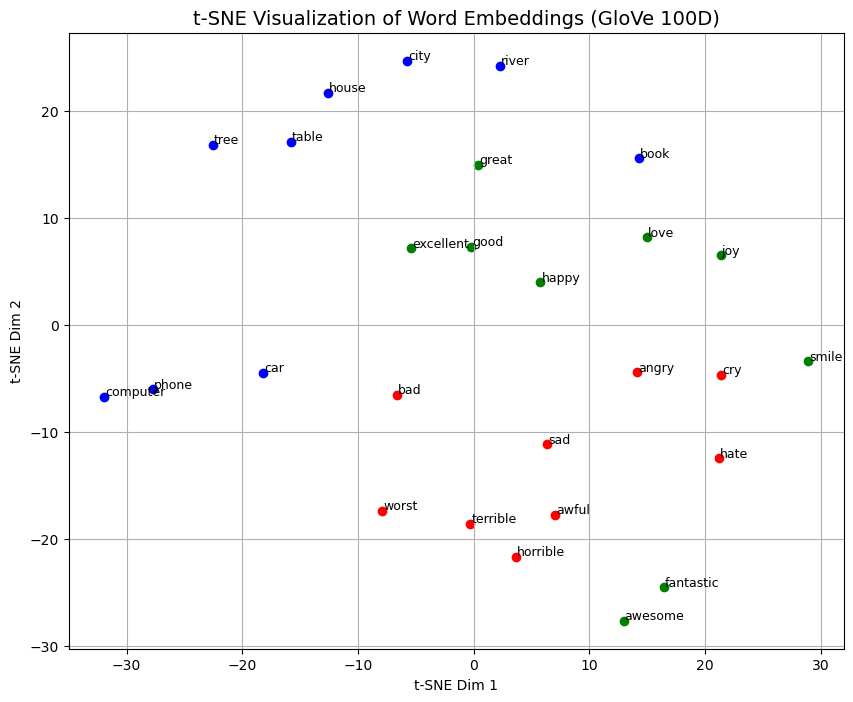

In [4]:
plt.figure(figsize=(10, 8))

colors = ["green"] * len(positive_words) + ["red"] * len(negative_words) + ["blue"] * len(neutral_words)

for i, word in enumerate(words):
    if word in embeddings_index:
        plt.scatter(X_tsne[i, 0], X_tsne[i, 1], color=colors[i])
        plt.text(X_tsne[i, 0] + 0.1, X_tsne[i, 1] + 0.1, word, fontsize=9)

plt.title("t-SNE Visualization of Word Embeddings (GloVe 100D)", fontsize=14)
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.grid(True)
plt.show()